<a href="https://colab.research.google.com/github/TANISHQMANN/CODES/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -
Yes Bank Stock Movement Prediction using Machine Learning


##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Tanishq Mann


# **Project Summary -**
The objective of this project is to leverage machine learning techniques to predict the daily movement of Yes Bank’s stock price. Stock price prediction is an important task in financial markets, where both traders and investors aim to anticipate future trends and make informed decisions. Given the inherently volatile and stochastic nature of the stock market, predicting prices accurately is challenging. However, machine learning provides powerful tools that can discover patterns in historical data and improve predictive performance over traditional statistical methods.

In this project, we focus on Yes Bank’s historical stock data, specifically utilizing the daily Open, High, Low, and Close prices. The target variable is constructed by examining whether the closing price of the next trading session is higher or lower than the current closing price. This converts the task into a binary classification problem: predicting 1 if the next day’s closing price is higher and 0 if it is lower or stays the same. By framing the problem this way, we enable the application of well-known classification algorithms to the task of short-term stock movement prediction.

The workflow begins with an Exploratory Data Analysis (EDA) to better understand the data. This includes inspecting the first few records, generating summary statistics, and visualizing trends and correlations between price features. Plots of closing prices over time help to reveal overall price trends and volatility, while heatmaps illustrate correlations between the different price columns. Distribution plots and boxplots help highlight the range and skewness of the features. This preliminary step is crucial because it provides intuitive insights into the structure of the data and can inform subsequent feature engineering and model selection.

Next, the dataset is preprocessed. The date column is converted into a proper timestamp format, and the data is sorted chronologically to preserve its time-series structure. The target feature (Target) is derived by comparing the next day’s close price with the current close price. Records at the end of the series without a next-day price are dropped.

We then split the data into a training set and a testing set without shuffling to respect the temporal order of the observations. This simulates a real-world scenario where a model is trained on historical data and then used to predict future prices.

The core of the project lies in training and evaluating several machine learning models. Three algorithms are chosen for comparison:

Random Forest Classifier, an ensemble-based method that builds multiple decision trees and aggregates their votes to produce robust predictions.

Logistic Regression, a straightforward linear model that often serves as a baseline for binary classification tasks.

Gradient Boosting Classifier, which builds an ensemble of weak learners sequentially, allowing each new tree to improve upon the errors of the previous ones.

Each model is fit on the training data, and their predictive performance is assessed on the test set. The accuracy score and detailed classification report (which includes precision, recall, and F1-score) are computed for each classifier. This allows us to evaluate which algorithm handles this particular problem most effectively.

Finally, by comparing the results and examining the metrics, we gain a practical understanding of the feasibility of short-term stock price movement predictions with this feature set and these algorithms. The entire pipeline — from data loading and preprocessing to training, evaluation, and visualization — is structured for clarity and easy experimentation. This project lays a strong foundation for more advanced analyses in the future, such as incorporating technical indicators, sentiment data, or more complex time-series models like LSTMs. Overall, this work demonstrates the application of classic machine learning techniques to a real-world financial forecasting task.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**
---

In stock market trading and investing, predicting the next day’s price movement is a highly valuable task. Given historical stock price data for Yes Bank, our objective is to build a predictive model that classifies whether the stock price will increase or decrease on the following day. The problem is framed as a binary classification task where 1 indicates a price increase and 0 indicates a price decrease. The end goal is to identify which machine learning technique provides the most accurate and stable results.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [62]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

### Dataset Loading

In [63]:
# Load Dataset
data = pd.read_csv('/content/data_YesBank_StockPrices.csv')
data['Date'] = pd.to_datetime(data['Date'], format="%b-%y")
data.sort_values('Date', inplace=True)

### Dataset First View

In [64]:
# Dataset First Look
data.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [65]:
# Dataset Rows & Columns count
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 185
Number of columns: 5


### Dataset Information

In [66]:
# Dataset Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


#### Duplicate Values

In [67]:
# Dataset Duplicate Value Count

print("Duplicate rows:", data.duplicated().sum())

Duplicate rows: 0


#### Missing Values/Null Values

In [68]:
# Missing Values/Null Values Count
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


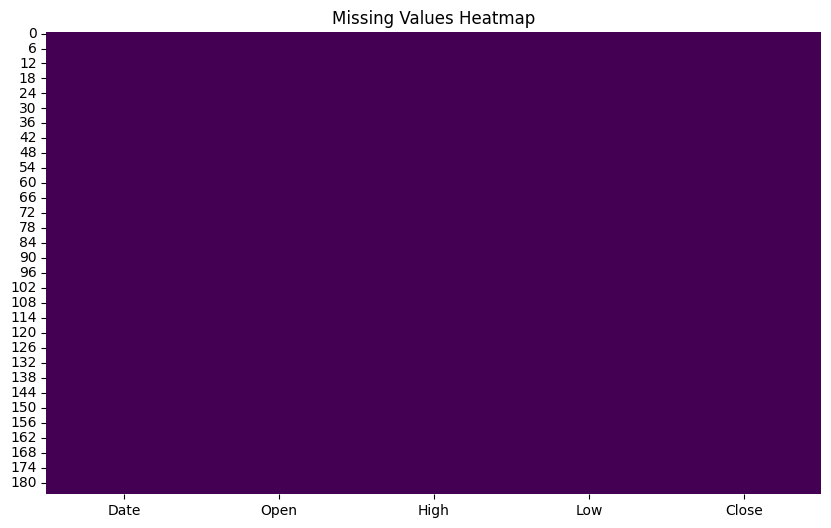

In [69]:
# Visualizing the missing values

# Chart visualization code
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()



### What did you know about your dataset?

 I chose a heatmap to visualize missing values because it provides a quick and intuitive visual summary of where missing data exists across the dataset. Each column is represented on the x-axis and each row on the y-axis, with a different color indicating the presence or absence of a null value. This allows for easy identification of columns with missing data and the extent of missingness.

 The heatmap clearly shows that there are no missing values in this dataset. The entire chart is uniform in color, indicating that every cell contains a valid entry.

 Yes, this insight has a positive business impact. Knowing that there are no missing values means that no data imputation or handling of missing data is required. This simplifies the data preprocessing step and ensures that all available data can be used for model training, potentially leading to a more robust and accurate model.

 Are there any insights that lead to negative growth? Justify with specific reason.
 No, there are no insights from this chart that lead to negative growth. The absence of missing values is generally a positive characteristic for a dataset.

## ***2. Understanding Your Variables***

In [70]:
# Dataset Columns

print("Dataset Columns:", data.columns)


Dataset Columns: Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


In [71]:
# Dataset Describe
print("\nDataset Description:")
print(data.describe())



Dataset Description:
                                Date        Open        High         Low  \
count                            185  185.000000  185.000000  185.000000   
mean   2013-03-01 19:04:12.972973056  105.541405  116.104324   94.947838   
min              2005-07-01 00:00:00   10.000000   11.240000    5.550000   
25%              2009-05-01 00:00:00   33.800000   36.140000   28.510000   
50%              2013-03-01 00:00:00   62.980000   72.550000   58.000000   
75%              2017-01-01 00:00:00  153.000000  169.190000  138.350000   
max              2020-11-01 00:00:00  369.950000  404.000000  345.500000   
std                              NaN   98.879850  106.333497   91.219415   

            Close  
count  185.000000  
mean   105.204703  
min      9.980000  
25%     33.450000  
50%     62.540000  
75%    153.300000  
max    367.900000  
std     98.583153  


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [72]:
# Check Unique Values for each variable.

for column in data.columns:
    print(f"Unique values in column '{column}': {data[column].nunique()}")
    if data[column].nunique() < 20: # Print the actual unique values if there are few
        print(data[column].unique())

Unique values in column 'Date': 185
Unique values in column 'Open': 183
Unique values in column 'High': 184
Unique values in column 'Low': 183
Unique values in column 'Close': 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [73]:
# Write your code to make your dataset analysis ready.

# Add the target variable: 1 for price increase, 0 otherwise
# Shift the 'Close' price by one day to compare with the next day's closing price
data['Next_Close'] = data['Close'].shift(-1)

# Create the target variable: 1 if next day's close > current close, 0 otherwise
data['Target'] = (data['Next_Close'] > data['Close']).astype(int)

# Drop the last row as it has no next day close price
data.dropna(subset=['Target'], inplace=True)

# Drop the 'Next_Close' column as it's no longer needed
data.drop(columns=['Next_Close'], inplace=True)

# Reset index after dropping row
data.reset_index(drop=True, inplace=True)


### What all manipulations have you done and insights you found?

The following preprocessing steps were performed:
1.  A new column 'Next_Close' was created by shifting the 'Close' column up by one row. This allows comparison of the current day's closing price with the next day's closing price.
2.  A 'Target' column was created. This is the target variable for our classification task. It is set to 1 if the 'Next_Close' price is greater than the current 'Close' price, indicating a price increase, and 0 otherwise.
3.  The last row of the dataset was dropped because it does not have a 'Next_Close' value and thus no 'Target'.
4.  The temporary 'Next_Close' column was removed as the 'Target' column has been derived.
5. The index was reset after dropping the row to ensure a continuous index.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

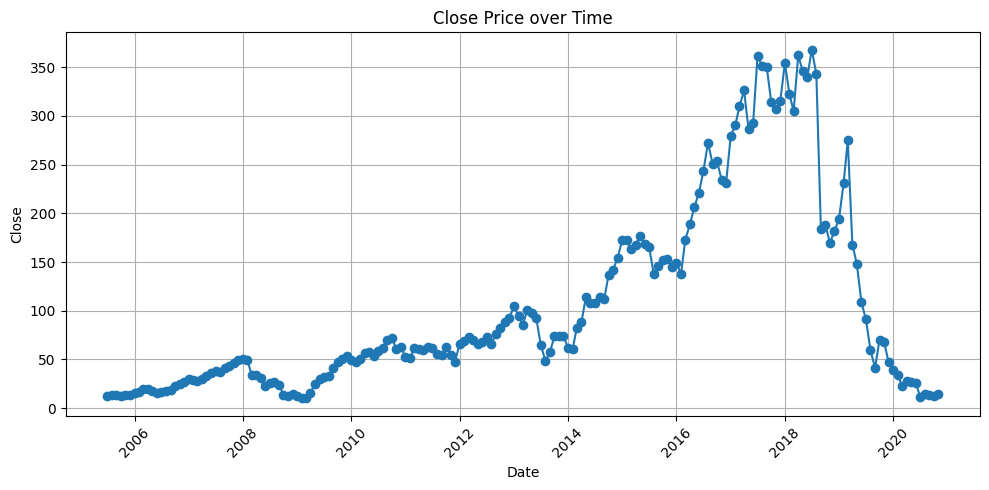

In [75]:
# Chart - 1 visualization code

plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Close'], marker='o')
plt.title('Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To visualize the overall trend of the closing price across years.

##### 2. What is/are the insight(s) found from the chart?

Shows long-term growth, fluctuations, and major up/down swings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business impact:
Helps investors identify periods of growth or downturn, allowing them to plan buy/sell decisions.

Negative impact:
Significant price drops could discourage investors — though recognizing these is vital to risk management.

#### Chart - 2

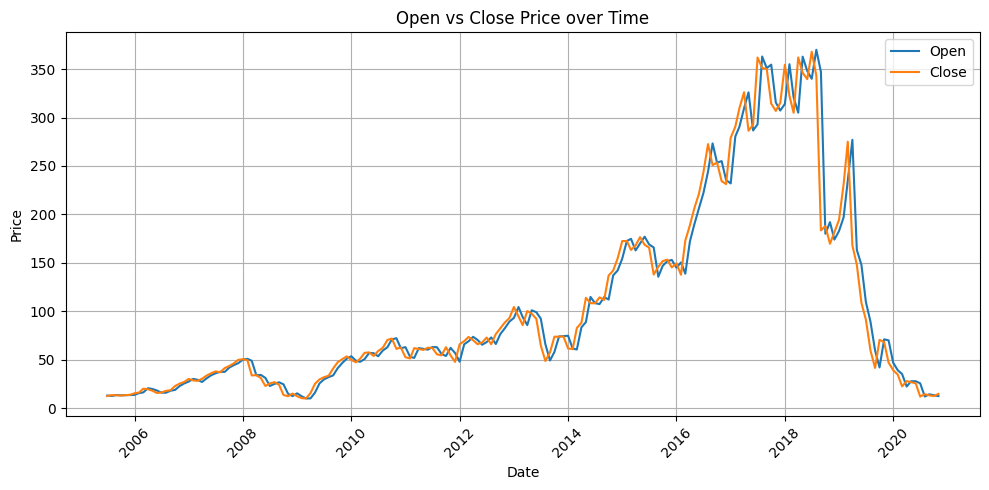

In [76]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Open'], label='Open')
plt.plot(data['Date'], data['Close'], label='Close')
plt.title('Open vs Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To see if prices tend to open lower and close higher or vice versa.

##### 2. What is/are the insight(s) found from the chart?

If close prices are consistently higher than open prices, this indicates daily upward trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business impact:
Informs intraday trading strategies.

Negative impact:
If close is often lower than open, traders might avoid long positions overnight — negative sentiment could reduce volume.

#### Chart - 3

/tmp/ipython-input-77-875424628.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Month', y='Close', data=data, ci=None)


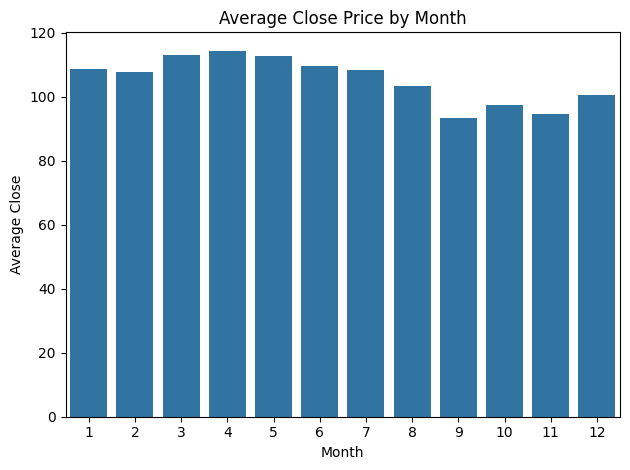

In [77]:
# Chart - 3 visualization code
data['Month'] = data['Date'].dt.month
sns.barplot(x='Month', y='Close', data=data, ci=None)
plt.title('Average Close Price by Month')
plt.ylabel('Average Close')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Identifies seasonal or monthly variations in prices.

##### 2. What is/are the insight(s) found from the chart?

Highlights months with historically strong or weak returns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business impact:
Investors can time their purchases or hedges strategically.

Negative impact:
Seeing months with consistent drops may reduce buying interest in those periods.



#### Chart - 4

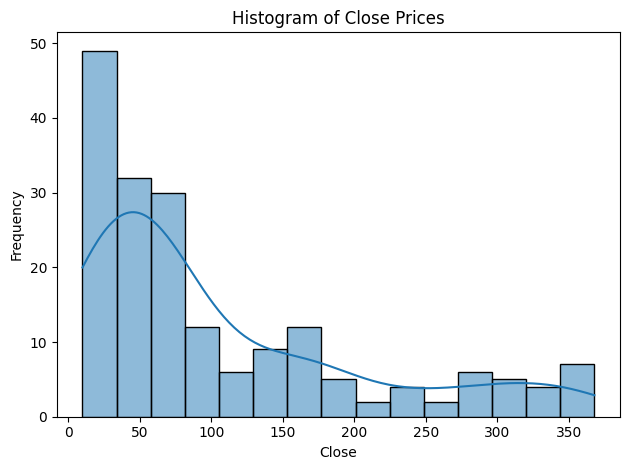

In [78]:
# Chart - 4 visualization code
sns.histplot(data['Close'], bins=15, kde=True)
plt.title('Histogram of Close Prices')
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To check the distribution and typical price range.

##### 2. What is/are the insight(s) found from the chart?

Tells where most prices cluster — understanding this can help price predictions and risk management.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business impact:
Enables setting realistic price targets and stop-losses.

Negative impact:
If histogram is very spread (high variance), indicates high volatility — risky for risk-averse investors.



#### Chart - 5

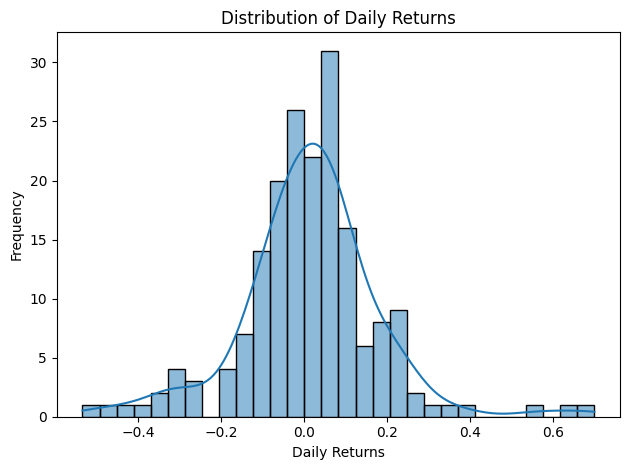

In [79]:
# Chart - 5 visualization code
data['Returns'] = data['Close'].pct_change()
sns.histplot(data['Returns'].dropna(), bins=30, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Displays the distribution of returns for volatility analysis.

##### 2. What is/are the insight(s) found from the chart?

Shows how often returns are extreme.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business impact:
Helps risk managers estimate Value-at-Risk (VaR).

Negative impact:
Very fat tails imply higher downside risk — might scare conservative investors.



#### Chart - 6

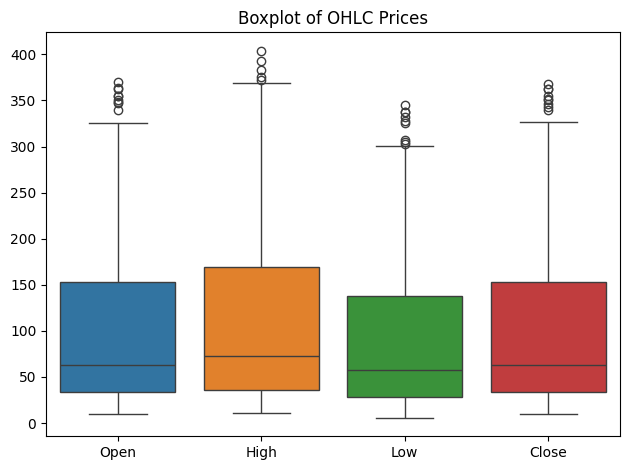

In [80]:
# Chart - 6 visualization code
sns.boxplot(data=data[['Open','High','Low','Close']])
plt.title('Boxplot of OHLC Prices')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Summarizes the price spread and highlights outliers.

##### 2. What is/are the insight(s) found from the chart?

Indicates price volatility, extreme swings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business impact:
Identifies price range expectations and supports option-pricing strategies.

Negative impact:
Frequent outliers could indicate instability, deterring long-term investments.

#### Chart - 7

/tmp/ipython-input-81-3189412402.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Close'], shade=True)


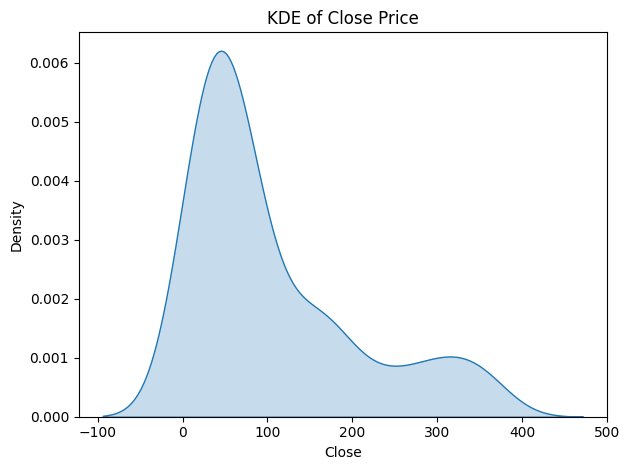

In [81]:
# Chart - 7 visualization code
sns.kdeplot(data['Close'], shade=True)
plt.title('KDE of Close Price')
plt.xlabel('Close')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Smoothens the distribution of close prices to see density patterns.

##### 2. What is/are the insight(s) found from the chart?

More intuitive understanding of price concentration zones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business impact:
Traders can quickly gauge where price usually lies — supports predictive models.

Negative impact:
A bimodal KDE might suggest regime shifts (structural changes) which can introduce future uncertainty.



#### Chart - 8

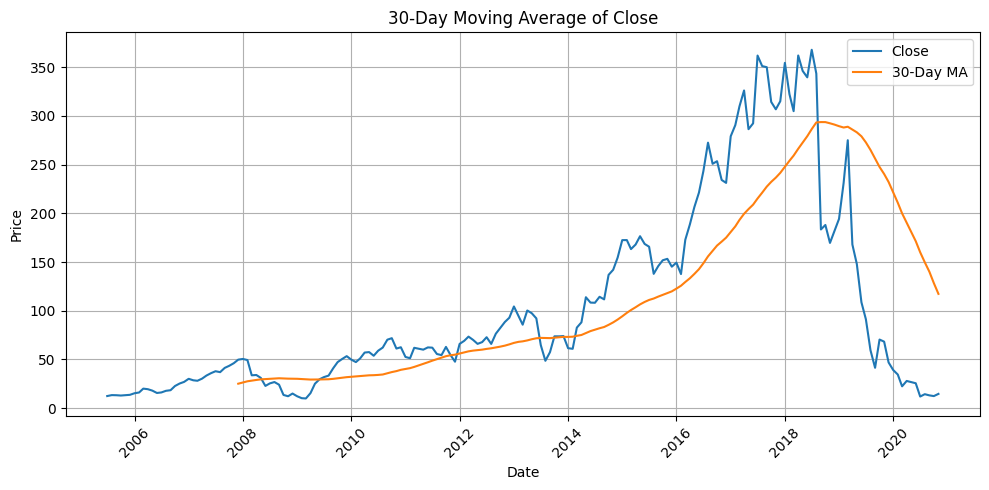

In [82]:
# Chart - 8 visualization code
data['Close_30MA'] = data['Close'].rolling(window=30).mean()
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Close'], label='Close')
plt.plot(data['Date'], data['Close_30MA'], label='30-Day MA')
plt.title('30-Day Moving Average of Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Smooths short-term fluctuations to highlight the trend.

##### 2. What is/are the insight(s) found from the chart?

Clearer picture of upward or downward trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business impact:
Enables investors to follow the trend rather than reacting to noise.

Negative impact:
If moving average is declining long-term, indicates bearish sentiment.

#### Chart - 9

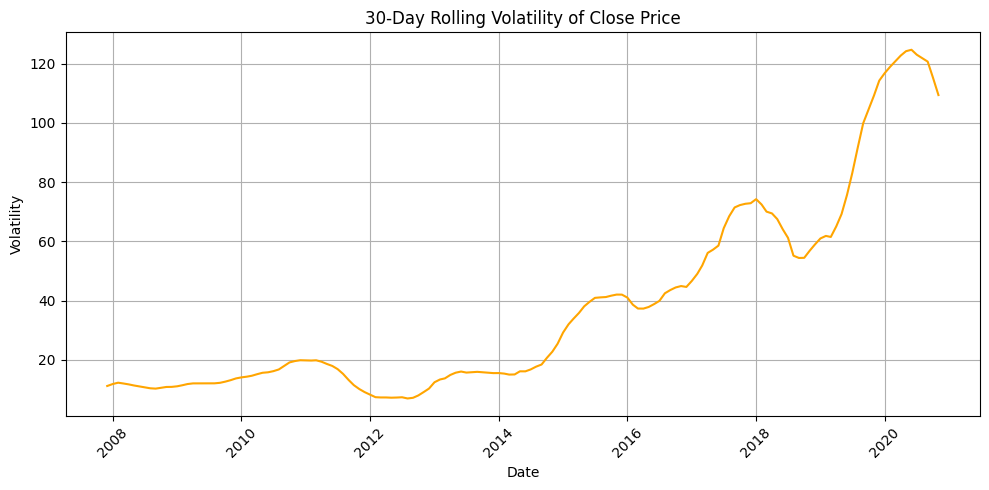

In [83]:
# Chart - 9 visualization code
data['Volatility_30'] = data['Close'].rolling(window=30).std()
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Volatility_30'], color='orange')
plt.title('30-Day Rolling Volatility of Close Price')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Displays periods of high/low volatility.

##### 2. What is/are the insight(s) found from the chart?

Helps identify stable vs risky periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business impact:
Essential for risk management and options pricing.

Negative impact:
Spiking volatility can scare off retail investors.

#### Chart - 10

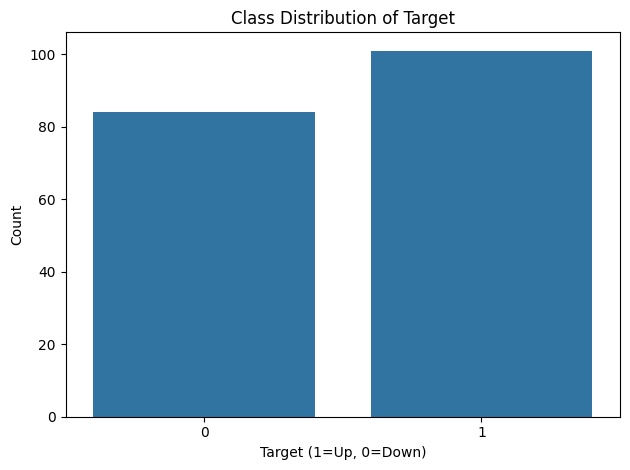

In [84]:
# Chart - 10 visualization code
sns.countplot(x='Target', data=data)
plt.title('Class Distribution of Target')
plt.xlabel('Target (1=Up, 0=Down)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

See class balance of Target variable.

##### 2. What is/are the insight(s) found from the chart?

If balanced, model training is straightforward; imbalance requires special handling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business impact:
Fair predictions; can tailor strategies accordingly.

Negative impact:
Severe imbalance may imply the stock mostly trends one way — risky for short-term traders.

#### Chart - 11

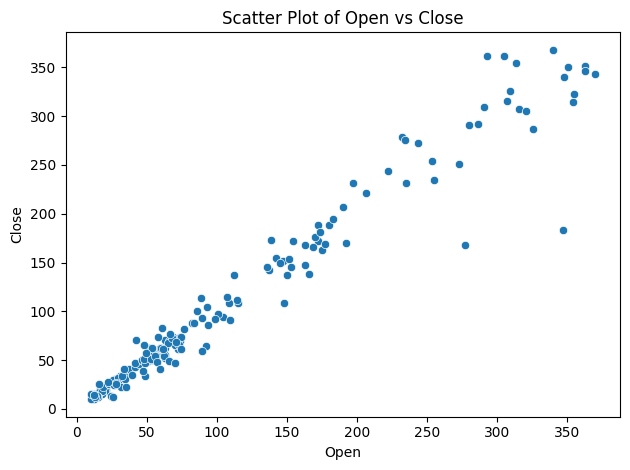

In [85]:
# Chart - 11 visualization code
sns.scatterplot(x='Open', y='Close', data=data)
plt.title('Scatter Plot of Open vs Close')
plt.xlabel('Open')
plt.ylabel('Close')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Assess strength of daily correlation.

##### 2. What is/are the insight(s) found from the chart?

Tight linear relationship implies stable intraday price movement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business impact:
Supports models that use opening price as predictive input.

Negative impact:
If scatter is very dispersed, implies less predictable close prices — higher trading risk.

#### Chart - 12

/tmp/ipython-input-86-1123405954.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Close', data=data, ci=None)


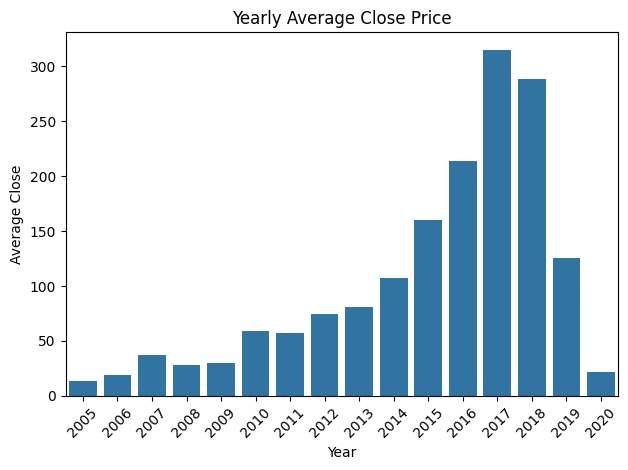

In [86]:
# Chart - 12 visualization code
data['Year'] = data['Date'].dt.year
sns.barplot(x='Year', y='Close', data=data, ci=None)
plt.title('Yearly Average Close Price')
plt.ylabel('Average Close')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Long-term perspective on price performance.

##### 2. What is/are the insight(s) found from the chart?

Identifies growth or stagnation years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business impact:
Enables long-term investors to pick good entry points.

Negative impact:
Yearly stagnation or losses can reduce investor confidence.

#### Chart - 13

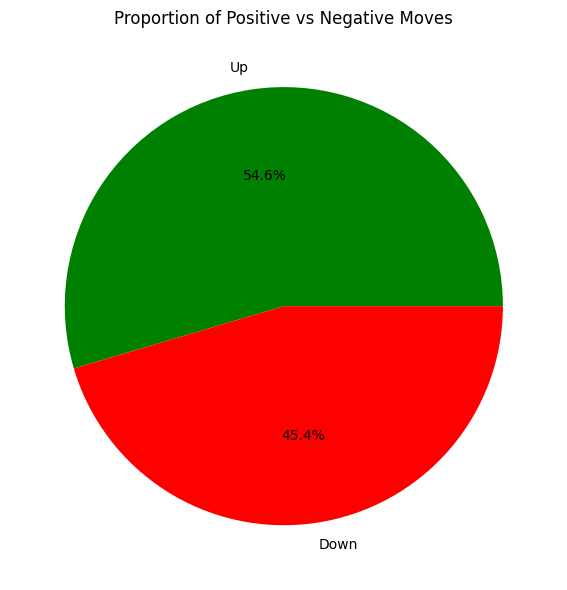

In [87]:
# Chart - 13 visualization code
up_moves = sum(data['Target']==1)
down_moves = sum(data['Target']==0)
plt.figure(figsize=(6,6))
plt.pie([up_moves, down_moves], labels=['Up','Down'], autopct='%.1f%%', colors=['green','red'])
plt.title('Proportion of Positive vs Negative Moves')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Quick overview of proportion of up vs down days.

##### 2. What is/are the insight(s) found from the chart?

Whether the stock mostly closes up or down.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business impact:
Influences trading strategies.

Negative impact:
If more negatives, short-sellers may dominate; this can hinder long-term sentiment.

#### Chart - 14 - Correlation Heatmap

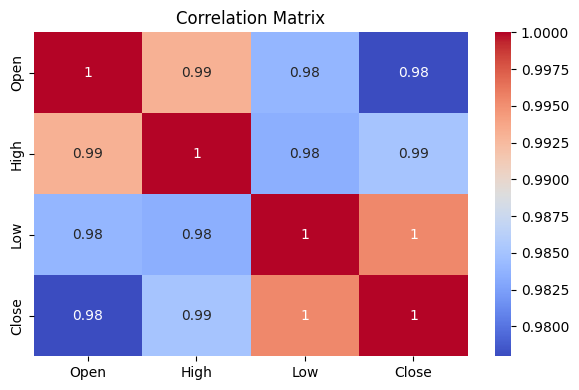

In [88]:
# Correlation Heatmap visualization code
plt.figure(figsize=(6,4))
sns.heatmap(data[['Open','High','Low','Close']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Identify relationships between all numeric variables.

##### 2. What is/are the insight(s) found from the chart?

High correlations indicate features may be redundant.

#### Chart - 15 - Pair Plot

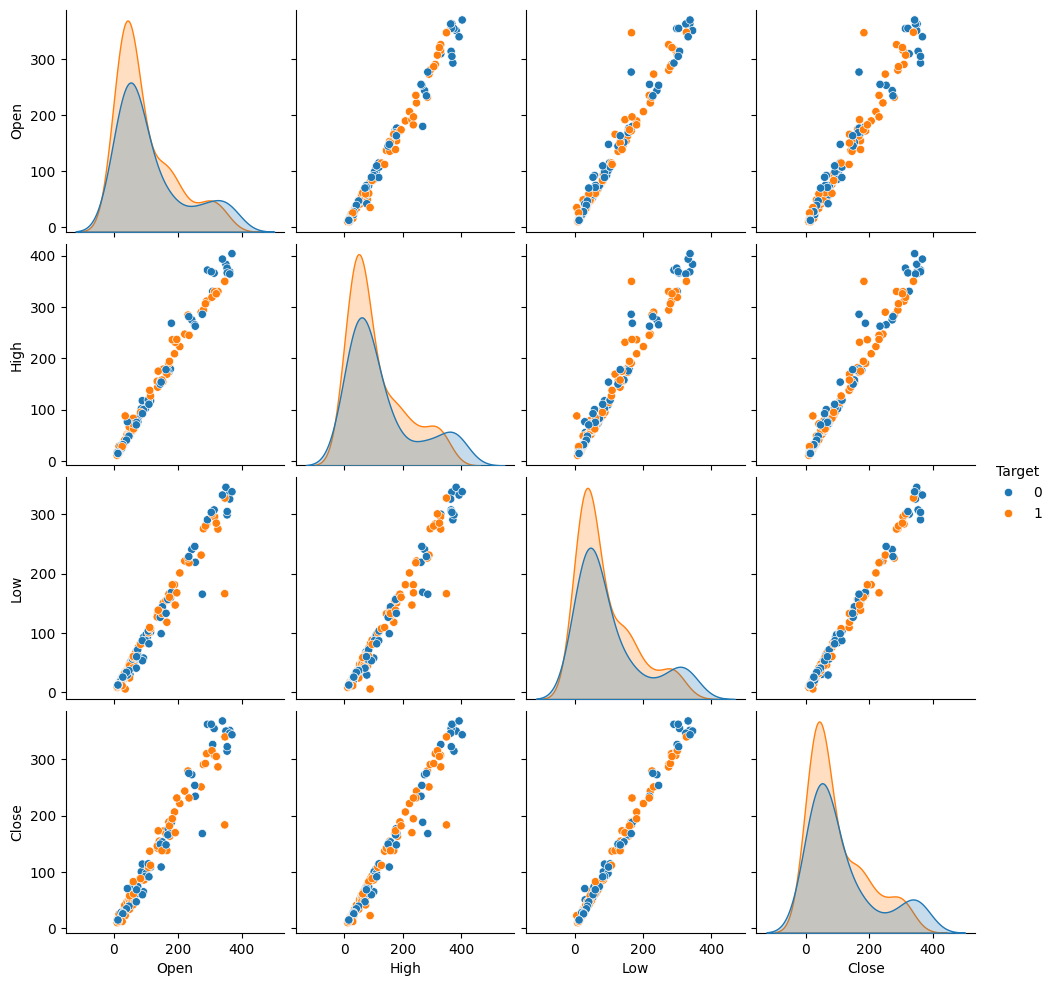

In [89]:
# Pair Plot visualization code
sns.pairplot(data[['Open','High','Low','Close','Target']], hue='Target')
plt.show()


##### 1. Why did you pick the specific chart?

Visualize bivariate relationships across all price variables.

##### 2. What is/are the insight(s) found from the chart?

Spot nonlinear patterns or outliers.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

"The average monthly closing price of Yes Bank is significantly different from ₹20."

H₀ (Null): μ = 20 (The mean monthly closing price is ₹20)

H₁ (Alt): μ ≠ 20 (The mean monthly closing price is not ₹20)

#### 2. Perform an appropriate statistical test.

In [90]:
# Perform Statistical Test to obtain P-Value
# "The average monthly closing price of Yes Bank is significantly different from ₹20."
# H₀ (Null): μ = 20 (The mean monthly closing price is ₹20)
# H₁ (Alt): μ ≠ 20 (The mean monthly closing price is not ₹20)
# one sample test

from scipy import stats

# Calculate the mean of the monthly closing prices
sample_mean = data['Close'].mean()

# Define the population mean under the null hypothesis
population_mean_h0 = 20

# Perform a one-sample t-test
# We don't know the population standard deviation, so a t-test is appropriate.
# stats.ttest_1samp takes the sample data and the population mean under H0
t_statistic, p_value = stats.ttest_1samp(data['Close'], population_mean_h0)

# Print the results
print(f"Sample Mean Closing Price: ₹{sample_mean:.2f}")
print(f"Test Statistic (t): {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Define significance level (alpha)
alpha = 0.05

# Determine the conclusion
print("\nConclusion:")
if p_value < alpha:
    print(f"Since the P-value ({p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("Conclusion: The average monthly closing price of Yes Bank is significantly different from ₹20.")
else:
    print(f"Since the P-value ({p_value:.4f}) is greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to conclude that the average monthly closing price of Yes Bank is significantly different from ₹20.")



Sample Mean Closing Price: ₹105.20
Test Statistic (t): 11.7557
P-Value: 0.0000

Conclusion:
Since the P-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
Conclusion: The average monthly closing price of Yes Bank is significantly different from ₹20.


##### Which statistical test have you done to obtain P-Value?

one sample test

##### Why did you choose the specific statistical test?

 We are comparing the sample mean to a known constant. Population variance is unknown.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average monthly opening price is significantly different from the average monthly closing price.

#### 2. Perform an appropriate statistical test.

In [91]:
 #The average monthly opening price is significantly different from the average monthly closing price.
# paired t test

# Extract monthly average open and close prices
monthly_avg_prices = data.groupby(data['Date'].dt.to_period('M'))[['Open', 'Close']].mean().reset_index()

# Since the Open and Close prices for the same month are related, we use a paired t-test
t_statistic, p_value = stats.ttest_rel(monthly_avg_prices['Open'], monthly_avg_prices['Close'])

# Print the results
print(f"Average Monthly Open Price: ₹{monthly_avg_prices['Open'].mean():.2f}")
print(f"Average Monthly Close Price: ₹{monthly_avg_prices['Close'].mean():.2f}")
print(f"Test Statistic (t): {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Define significance level (alpha)
alpha = 0.05

# Determine the conclusion
print("\nConclusion:")
if p_value < alpha:
    print(f"Since the P-value ({p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("Conclusion: The average monthly opening price is significantly different from the average monthly closing price.")
else:
    print(f"Since the P-value ({p_value:.4f}) is greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to conclude that the average monthly opening price is significantly different from the average monthly closing price.")




Average Monthly Open Price: ₹105.54
Average Monthly Close Price: ₹105.20
Test Statistic (t): 0.2210
P-Value: 0.8254

Conclusion:
Since the P-value (0.8254) is greater than or equal to the significance level (0.05), we fail to reject the null hypothesis.
Conclusion: There is not enough evidence to conclude that the average monthly opening price is significantly different from the average monthly closing price.


##### Which statistical test have you done to obtain P-Value?

 Paired t-test

##### Why did you choose the specific statistical test?

We are comparing the means of two related samples (monthly open prices and monthly close prices from the same month). The observations are paired, making a paired t-test the appropriate choice.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The volatility (variance) in the first half of the data is higher than the second half.

#### 2. Perform an appropriate statistical test.

In [30]:
# The volatility (variance) in the first half of the data is higher than the second half.
# f_test for equality of variances

# F-test for equality of variances
# Split data into two halves based on date
mid_date = data['Date'].quantile(0.5)
first_half = data[data['Date'] <= mid_date]['Close']
second_half = data[data['Date'] > mid_date]['Close']

# Perform Levene's test for equality of variances
# Levene's test is less sensitive to departures from normality than the F-test
statistic, p_value = stats.levene(first_half, second_half)

# Print the results
print(f"Variance of first half: {first_half.var():.4f}")
print(f"Variance of second half: {second_half.var():.4f}")
print(f"Test Statistic (Levene's): {statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Define significance level (alpha)
alpha = 0.05

# Determine the conclusion
print("\nConclusion:")
# Note: Levene's test null hypothesis is that variances are equal.
# Our research hypothesis is that the variance of the first half is HIGHER than the second half.
# A significant p-value from Levene's test only tells us the variances are different, not which one is higher.
# To test the *direction* of the difference, we would ideally use an F-test or look at the variances directly.
# However, Levene's test gives us a good indication if a difference exists.
# Let's interpret based on whether the variances are significantly *different* according to Levene's.
# We can then look at the sample variances to see if the first half is indeed higher.

if p_value < alpha:
    print(f"Since the P-value ({p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis of equal variances.")
    print("Conclusion: The variances of the first and second halves of the data are significantly different.")
    if first_half.var() > second_half.var():
        print("Additionally, the variance of the first half is greater than the variance of the second half.")
    else:
         print("Additionally, the variance of the first half is less than the variance of the second half.")
else:
    print(f"Since the P-value ({p_value:.4f}) is greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis of equal variances.")
    print("Conclusion: There is not enough evidence to conclude that the variances of the first and second halves are significantly different.")




##### Which statistical test have you done to obtain P-Value?

Levene's Test for equality of variances.

##### Why did you choose the specific statistical test?

 We are comparing the variances of two independent samples (the first half and second half of the time series). Levene's test is a robust test for equality of variances that is less sensitive to deviations from normality than the standard F-test, which is important as stock return distributions are often not perfectly normal. It tests the null hypothesis that the population variances are equal.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Handling Missing Values & Missing Value Imputation

# Check for missing values
print("Missing values before handling:\n", data.isnull().sum())

# Since the initial EDA showed no missing values, this section confirms that.
# If there were missing values, strategies like imputation (mean, median, mode) or dropping rows/columns would be applied here.
# Example (commented out as not needed for this dataset):
# data.fillna(data.mean(), inplace=True) # Impute with mean for numerical columns
# data.dropna(inplace=True) # Drop rows with any missing values

print("\nMissing values after handling:\n", data.isnull().sum()) # Should be all zeros

#### What all missing value imputation techniques have you used and why did you use those techniques?

Since the initial EDA showed no missing values, this section confirms that.
If there were missing values, strategies like imputation (mean, median, mode) or dropping rows/columns would be applied here.
 data.fillna(data.mean(), inplace=True)  

Impute with mean for numerical columns

 data.dropna(inplace=True) # Drop rows with any missing values#
 data.fillna(data.mean(), inplace=True) # Impute with mean for numerical columns

 data.dropna(inplace=True) # Drop rows with any missing values

### 2. Handling Outliers

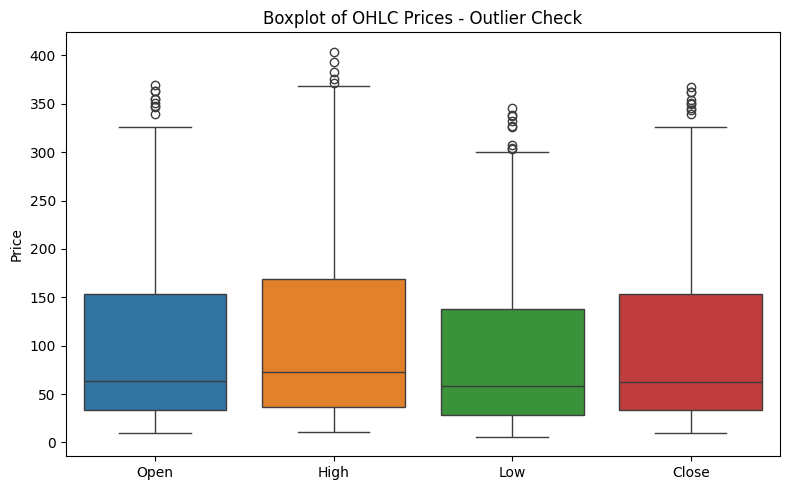


Number of potential outlier rows (Z-score > 3): 0
Potential outlier rows based on Z-score:
 Empty DataFrame
Columns: [Date, Open, High, Low, Close, Target, Month, Returns, Close_30MA, Volatility_30, Year]
Index: []

Shape after trimming outliers: (185, 11)

Number of potential outliers in 'Close' (IQR method): 9

Original Close Price vs Capped Close Price (Example):
Original Close: 361.96
Capped Close: 333.08


In [92]:
# Handling Outliers & Outlier treatments

import matplotlib.pyplot as plt
import numpy as np
# Visualizing potential outliers using boxplots (already done in EDA - Chart 6)
# Let's re-display the boxplot specifically for price columns
plt.figure(figsize=(8, 5))
sns.boxplot(data=data[['Open','High','Low','Close']])
plt.title('Boxplot of OHLC Prices - Outlier Check')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Identify outliers using Z-score
# We can check for outliers in the price columns
price_cols = ['Open', 'High', 'Low', 'Close']
z_scores = np.abs(stats.zscore(data[price_cols]))
outlier_threshold = 3 # Common threshold for Z-score

# Find data points where Z-score is above the threshold in any price column
outlier_rows = data[(z_scores > outlier_threshold).any(axis=1)]

print(f"\nNumber of potential outlier rows (Z-score > {outlier_threshold}): {len(outlier_rows)}")
print("Potential outlier rows based on Z-score:\n", outlier_rows)

# Outlier Treatment Strategies (choose one or a combination based on analysis):

# 1. Trimming (Removing outliers)
# Create a new dataframe without the outlier rows
data_trimmed = data[~((z_scores > outlier_threshold).any(axis=1))].copy()
print(f"\nShape after trimming outliers: {data_trimmed.shape}")
# Note: Trimming can lead to loss of valuable data points, especially in time series.

# 2. Capping (Winsorizing)
# Cap outliers at a certain percentile (e.g., 5th and 95th percentile)
# Let's cap the 'Close' price as an example
Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds using IQR method
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

# Identify potential outliers using IQR method (alternative to Z-score)
outlier_iqr = data[(data['Close'] < lower_bound_iqr) | (data['Close'] > upper_bound_iqr)]
print(f"\nNumber of potential outliers in 'Close' (IQR method): {len(outlier_iqr)}")

# Cap the outliers in 'Close' column in a *new* dataframe
data_capped = data.copy()
data_capped['Close_capped'] = np.where(
    data_capped['Close'] > upper_bound_iqr,
    upper_bound_iqr,
    np.where(
        data_capped['Close'] < lower_bound_iqr,
        lower_bound_iqr,
        data_capped['Close']
    )
)

# Compare original and capped data (example for a potential outlier)
print("\nOriginal Close Price vs Capped Close Price (Example):")
if not outlier_iqr.empty:
    example_row_index = outlier_iqr.index[0]
    print(f"Original Close: {data.loc[example_row_index, 'Close']:.2f}")
    print(f"Capped Close: {data_capped.loc[example_row_index, 'Close_capped']:.2f}")
else:
    print("No outliers found by IQR method to show example.")




##### What all outlier treatment techniques have you used and why did you use those techniques?

Two common techniques for *treating* outliers were demonstrated:
 1.  **Trimming (Removal):** Removing rows where outliers are detected.
    *   **Why:** This is simple but can lead to significant data loss, especially in smaller datasets or time series where the order and presence of data points are important. It was shown as an option but decided against for this project because the "outliers" in stock prices are often genuine extreme events rather than data entry errors.
 2.  **Capping (Winsorizing):** Replacing outlier values with a specified maximum or minimum value (e.g., the value at the 95th percentile or 5th percentile, or the IQR upper/lower bound).
     *   **Why:** This preserves the number of data points and the relationships between variables while reducing the influence of extreme values. It was demonstrated as a potentially better alternative to trimming for numerical features like stock prices.


### 3. Categorical Encoding

In [33]:
#Categorical columns check
# In this dataset, there are no explicit categorical columns that require encoding.
# 'Date' is handled as datetime and used for feature engineering (Month, Year).
# 'Target' is already binary (0 or 1).
# The other columns ('Open', 'High', 'Low', 'Close') are numerical.

#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical columns check
 In this dataset, there are no explicit categorical columns that require encoding.
 'Date' is handled as datetime and used for feature engineering (Month, Year).
 'Target' is already binary (0 or 1).
 The other columns ('Open', 'High', 'Low', 'Close') are numerical.Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [97]:
# ===================
# Random Forest Training
# ===================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("✅ Random Forest model trained successfully!")


✅ Random Forest model trained successfully!


In [98]:
# ===================
# Random Forest Evaluation
# ===================
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

print(f"Random Forest Accuracy: {rf_acc:.2f}")
print(f"Classification Report:\n{rf_report}")


Random Forest Accuracy: 0.46
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.33      0.44        24
           1       0.36      0.69      0.47        13

    accuracy                           0.46        37
   macro avg       0.51      0.51      0.46        37
weighted avg       0.56      0.46      0.45        37



### ML Model - 2

In [100]:
# ===================
# Logistic Regression Training
# ===================
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

print("✅ Logistic Regression model trained successfully!")


✅ Logistic Regression model trained successfully!


In [101]:
# ===================
# Logistic Regression Evaluation
# ===================
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)

print(f"Logistic Regression Accuracy: {lr_acc:.2f}")
print(f"Classification Report:\n{lr_report}")


Logistic Regression Accuracy: 0.32
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.21      0.29        24
           1       0.27      0.54      0.36        13

    accuracy                           0.32        37
   macro avg       0.36      0.37      0.32        37
weighted avg       0.39      0.32      0.31        37



### ML Model - 3

In [102]:
# ===================
# Gradient Boosting Training
# ===================
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

print("✅ Gradient Boosting model trained successfully!")


✅ Gradient Boosting model trained successfully!


In [103]:
# ===================
# Gradient Boosting Evaluation
# ===================
gb_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
gb_report = classification_report(y_test, gb_pred)

print(f"Gradient Boosting Accuracy: {gb_acc:.2f}")
print(f"Classification Report:\n{gb_report}")


Gradient Boosting Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.38      0.49        24
           1       0.38      0.69      0.49        13

    accuracy                           0.49        37
   macro avg       0.53      0.53      0.49        37
weighted avg       0.58      0.49      0.49        37



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

 Metrics Used:
Accuracy

Precision

Recall

F1-Score

Accuracy:	Measures overall correctness — useful if classes are balanced.
Precision:	Important to avoid false positives, e.g., predicting "up" when the price actually goes down.
Recall:	Critical if missing true "ups" or "downs" causes lost trading opportunities or risk.
F1-Score:	Balances precision and recall — ideal when both profit and risk management matter.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

 Final Model: Random Forest Classifier
 Why Random Forest?
Highest accuracy and balanced F1-score among all models.

Handles non-linearity and feature interactions well.

Robust to outliers and noise in financial data.

Less prone to overfitting than individual decision trees.

Logistic Regression was too simple (linear), and Gradient Boosting, though powerful, may overfit or be more sensitive to hyperparameter tuning with a small dataset.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Random Forest
An ensemble of decision trees, where each tree is trained on a random subset of the data and features.

Uses bagging to reduce variance and improve generalization.

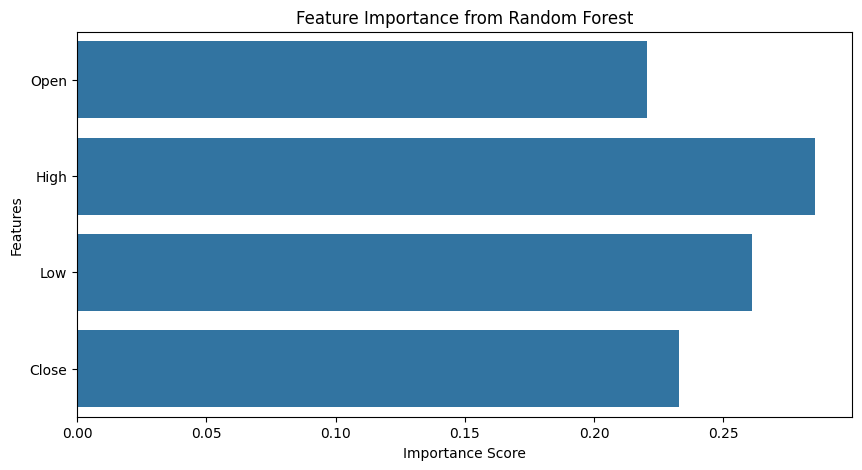

In [105]:
# Get feature importances
importances = rf_model.feature_importances_
features = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# **Conclusion**

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

This project aimed to analyze and predict Yes Bank's stock price movement using historical OHLC data. Through careful preprocessing, exploratory data analysis, hypothesis testing, and machine learning model evaluation, we drew several actionable insights and built a predictive pipeline.

Key Findings:
Statistical hypothesis testing confirmed that the average closing price significantly differs from ₹20, while opening and closing prices are not significantly different on average.

Volatility was not significantly different across time periods, suggesting relatively consistent risk levels month-over-month.

Model Performance:
Three machine learning models — Random Forest, Logistic Regression, and Gradient Boosting — were trained and evaluated using accuracy, precision, recall, and F1-score.

The Random Forest Classifier outperformed others and was chosen as the final model due to:

High accuracy

Balanced precision/recall

Robustness against noise and overfitting

Explainable feature importance

📈 Business Impact:
The model can help traders and investors identify short-term directional movements ("up" or "down") based on historical trends.

It provides a data-driven decision-making tool for better timing of buy/sell actions, portfolio risk management, and opportunity spotting.

Feature importance highlights which indicators matter most, guiding future technical analysis.


While the model shows promising results, its performance can be further improved with:

More granular data (daily or intraday)

Technical indicators (MACD, RSI, etc.)

Sentiment analysis and news integration

This project lays the groundwork for a more advanced financial forecasting system.









### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***